개포동 특징
==========

사용한 변수명
=========
- Gaepo_Street_data_path : 길단위인구 csv 데이터 경로

- Gaepo_Street_data_df : 길단위인구 데이터프레임

- data_filtered : 이상치 제거한 데이터프레임

- filtered_data_202303 : 이상치 제거한 20233으로 맞춘 데이터프레임

- target_dong : 필터링할 동

- Gaepo_Resident_data_path : 상주인구 csv 데이터 경로

- Gaepo_Resident_data_df : 상주인구 데이터프레임

- filtered_data_2 : 이상치 제거한 상주인구 데이터프레임

- Gaepo_data_path1 : 상주인구 csv 데이터 경로

- Gaepo_df1 : 상주인구 데이터프레임

- Gaepo_data_path2 : 합쳐진_동_음식점_종류별_매출 csv 데이터 경로

- Gaepo_df2 : 합쳐진_동_음식점_종류별_매출 데이터프레임

- merged_df : 행정동 기준으로 데이터프레임 Gaepo_df1와 Gaepo_df2 합치는 변수

- quarter_20233_df : '기준_년분기_코드'가 '20233'인 데이터를 선택하여 새로운 데이터프레임 생성


- 길단위인구 데이터 불러와서 분석해보기


In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Gaepo_Street_data_path = '../csv/new_길단위인구_행정동.csv'
Gaepo_Street_data_df = pd.read_csv(Gaepo_Street_data_path, encoding='utf-8-sig')
pd.options.display.float_format = '{:}'.format
Gaepo_Street_data_df.head(3)

,행정동,기준_년분기_코드,행정동_코드,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,...,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_24_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수
0,신사동,20231,11680510.0,7192218.0,3370126.0,3822091.0,780389.0,1509263.0,1643640.0,1393822.0,...,1308251.0,1539682.0,735589.0,1027213.0,1070692.0,1074375.0,1098483.0,1126119.0,986327.0,809009.0
1,신사동,20232,11680510.0,7082053.0,3334166.0,3747885.0,774451.0,1441425.0,1611377.0,1400039.0,...,1251030.0,1482277.0,731224.0,1010768.0,1051907.0,1071804.0,1080222.0,1086305.0,955612.0,825435.0
2,신사동,20233,11680510.0,7070958.0,3309806.0,3761152.0,816554.0,1425051.0,1580370.0,1382492.0,...,1244333.0,1470193.0,724339.0,1046473.0,1059666.0,1072964.0,1050833.0,1070687.0,942287.0,828046.0


<Axes: xlabel='총_유동인구_수'>

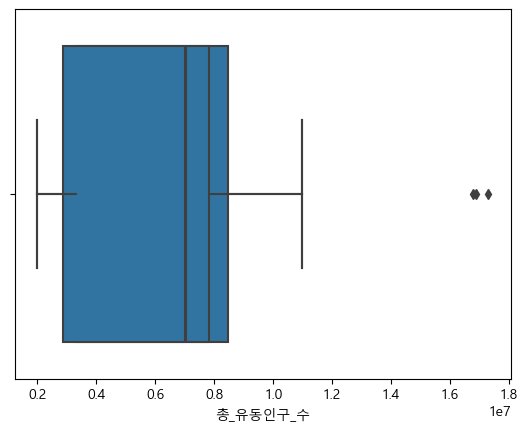

In [113]:
import seaborn as sns

# 상자 그림(Boxplot)을 사용하여 이상치 탐지
sns.boxplot(x=Gaepo_Street_data_df['총_유동인구_수'])

# 이상치 제거
Q1 = Gaepo_Street_data_df['총_유동인구_수'].quantile(0.25)
Q3 = Gaepo_Street_data_df['총_유동인구_수'].quantile(0.75)
IQR = Q3 - Q1

data_filtered = Gaepo_Street_data_df[(Gaepo_Street_data_df['총_유동인구_수'] >= Q1 - 1.5 * IQR) & (Gaepo_Street_data_df['총_유동인구_수'] <= Q3 + 1.5 * IQR)]

# 이상치 제거 후 상자 그림(Boxplot) 다시 그리기
sns.boxplot(x=data_filtered['총_유동인구_수'])


In [114]:
# 개포동 데이터 가져오기
filtered_data = Gaepo_Street_data_df[Gaepo_Street_data_df['행정동'] == '개포동']

# 2023 3분기 데이터 가져오기
filtered_data_202303 = filtered_data[filtered_data['기준_년분기_코드'] == 20233]

# 결과 출력
print(filtered_data_202303)

    행정동  기준_년분기_코드             행정동_코드           총_유동인구_수          남성_유동인구_수  \
11  개포동      20233 11680673.333333334 2123894.6666666665 1001759.3333333334   

    여성_유동인구_수  연령대_10_유동인구_수      연령대_20_유동인구_수  연령대_30_유동인구_수  연령대_40_유동인구_수  \
11  1122135.0       419900.0 230536.66666666663       314450.0       378686.0   

    ...  시간대_14_17_유동인구_수  시간대_17_21_유동인구_수  시간대_21_24_유동인구_수  \
11  ...          251687.0 317158.3333333333 259839.3333333333   

          월요일_유동인구_수        화요일_유동인구_수        수요일_유동인구_수        목요일_유동인구_수  \
11 312470.3333333333 308813.3333333333 310972.3333333333 305250.6666666667   

          금요일_유동인구_수        토요일_유동인구_수        일요일_유동인구_수  
11 302856.3333333333 289012.3333333333 294521.3333333333  

[1 rows x 25 columns]


In [115]:
round(filtered_data_202303,1)

,행정동,기준_년분기_코드,행정동_코드,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,...,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_24_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수
11,개포동,20233,11680673.3,2123894.7,1001759.3,1122135.0,419900.0,230536.7,314450.0,378686.0,...,251687.0,317158.3,259839.3,312470.3,308813.3,310972.3,305250.7,302856.3,289012.3,294521.3


In [116]:
Gaepo_Street_data_df.columns

Index(['행정동', '기준_년분기_코드', '행정동_코드', '총_유동인구_수', '남성_유동인구_수', '여성_유동인구_수',
       '연령대_10_유동인구_수', '연령대_20_유동인구_수', '연령대_30_유동인구_수', '연령대_40_유동인구_수',
       '연령대_50_유동인구_수', '연령대_60_이상_유동인구_수', '시간대_00_06_유동인구_수',
       '시간대_06_11_유동인구_수', '시간대_11_14_유동인구_수', '시간대_14_17_유동인구_수',
       '시간대_17_21_유동인구_수', '시간대_21_24_유동인구_수', '월요일_유동인구_수', '화요일_유동인구_수',
       '수요일_유동인구_수', '목요일_유동인구_수', '금요일_유동인구_수', '토요일_유동인구_수', '일요일_유동인구_수'],
      dtype='object')

- 연령대별

<Axes: >

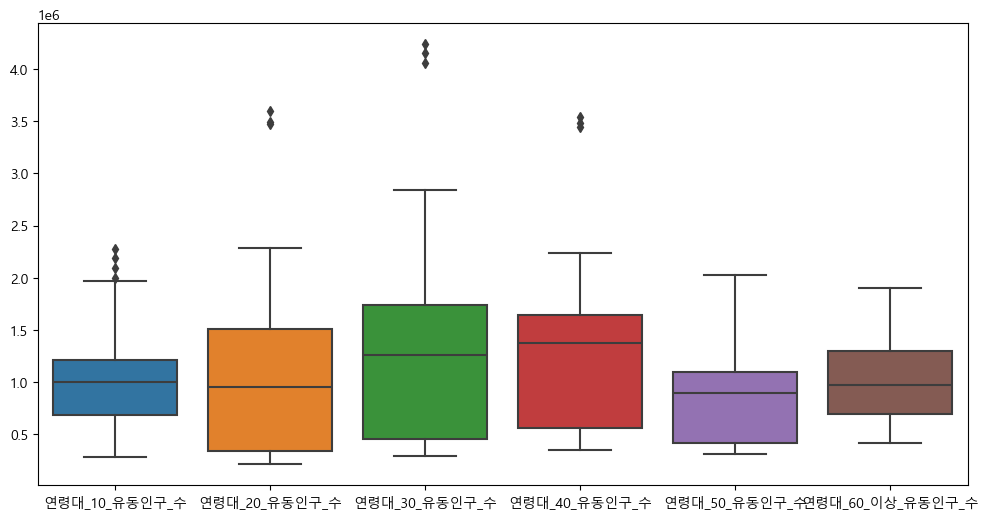

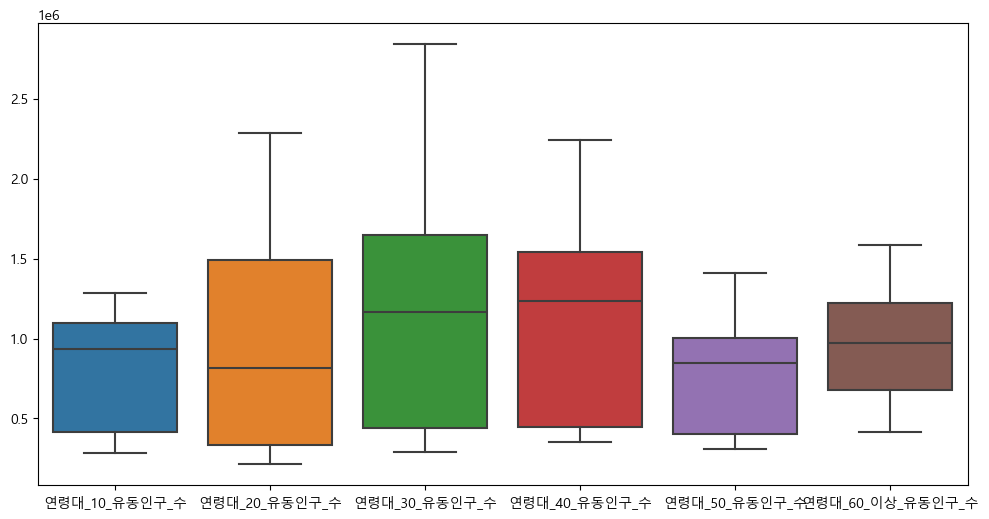

In [117]:
# 각 연령대별로 상자 그림(Boxplot)을 그려서 이상치 탐지
plt.figure(figsize=(12, 6))
sns.boxplot(data=Gaepo_Street_data_df[['연령대_10_유동인구_수', '연령대_20_유동인구_수', '연령대_30_유동인구_수', '연령대_40_유동인구_수',
       '연령대_50_유동인구_수', '연령대_60_이상_유동인구_수']])

# 이상치 제거
Q1 = Gaepo_Street_data_df[['연령대_10_유동인구_수', '연령대_20_유동인구_수', '연령대_30_유동인구_수', '연령대_40_유동인구_수',
       '연령대_50_유동인구_수', '연령대_60_이상_유동인구_수']].quantile(0.25)
Q3 = Gaepo_Street_data_df[['연령대_10_유동인구_수', '연령대_20_유동인구_수', '연령대_30_유동인구_수', '연령대_40_유동인구_수',
       '연령대_50_유동인구_수', '연령대_60_이상_유동인구_수']].quantile(0.75)
IQR = Q3 - Q1

# 각 연령대별로 이상치 제거
data_filtered = Gaepo_Street_data_df[~((Gaepo_Street_data_df[['연령대_10_유동인구_수', '연령대_20_유동인구_수', '연령대_30_유동인구_수', '연령대_40_유동인구_수',
       '연령대_50_유동인구_수', '연령대_60_이상_유동인구_수']] < (Q1 - 1.5 * IQR)) | 
                       (Gaepo_Street_data_df[['연령대_10_유동인구_수', '연령대_20_유동인구_수', '연령대_30_유동인구_수', '연령대_40_유동인구_수',
       '연령대_50_유동인구_수', '연령대_60_이상_유동인구_수']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# 이상치 제거 후 연령대별로 박스플롯(Boxplot) 다시 그리기
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_filtered[['연령대_10_유동인구_수', '연령대_20_유동인구_수', '연령대_30_유동인구_수', '연령대_40_유동인구_수',
       '연령대_50_유동인구_수', '연령대_60_이상_유동인구_수']])



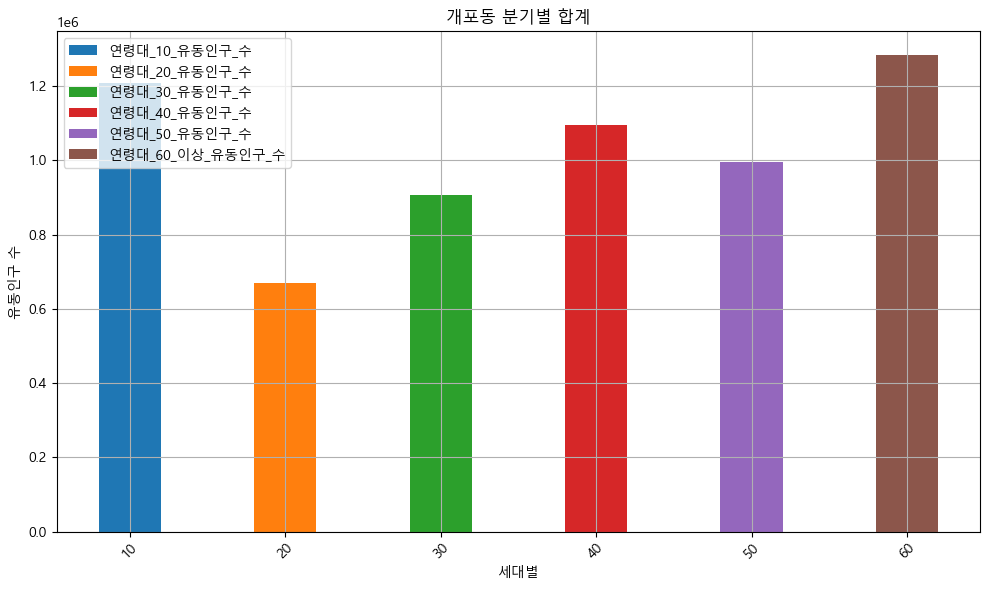

In [118]:
# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# 필터링할 행정동
target_dong = '개포동'

# 해당 행정동과 년분기에 해당하는 데이터 추출
filtered_data = Gaepo_Street_data_df[(Gaepo_Street_data_df['행정동'] == target_dong)]

# 시각화할 컬럼 선택
columns_to_plot = ['연령대_10_유동인구_수', '연령대_20_유동인구_수', '연령대_30_유동인구_수', 
                   '연령대_40_유동인구_수','연령대_50_유동인구_수', '연령대_60_이상_유동인구_수']

# 요일별 유동인구 시각화 (막대 그래프)
plt.figure(figsize=(10, 6))
x_labels = ['10', '20', '30', '40', '50', '60']  # x축 레이블
x = range(len(columns_to_plot))
for i, column in enumerate(columns_to_plot):
    plt.bar(x[i], filtered_data[column].sum(), label=column, width=0.4)  # 각 연령대별 상주인구 수를 합하여 막대로 표시

plt.title(f'{target_dong} 분기별 합계')
plt.xlabel('세대별')
plt.ylabel('유동인구 수')
plt.xticks(x, x_labels, rotation=45)  # x축 레이블 지정
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


- 시간대별

<Axes: >

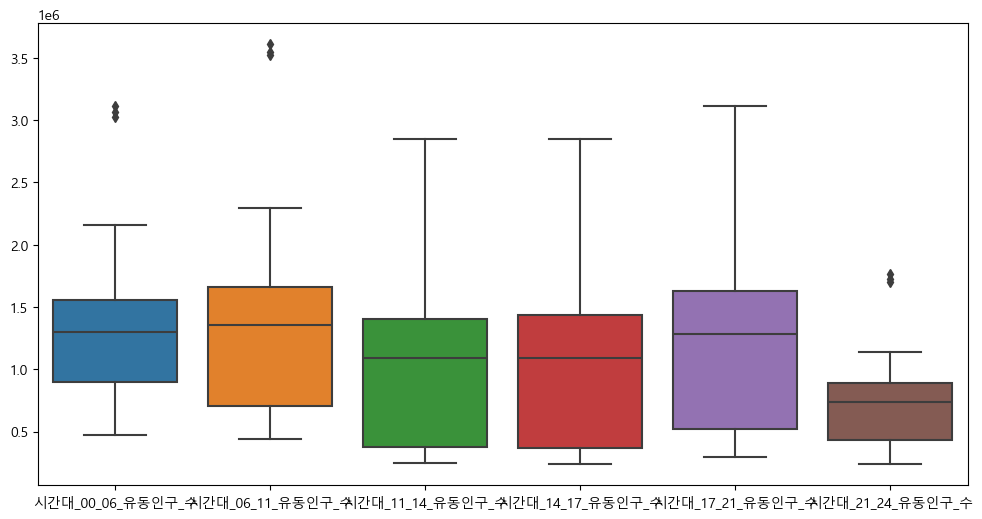

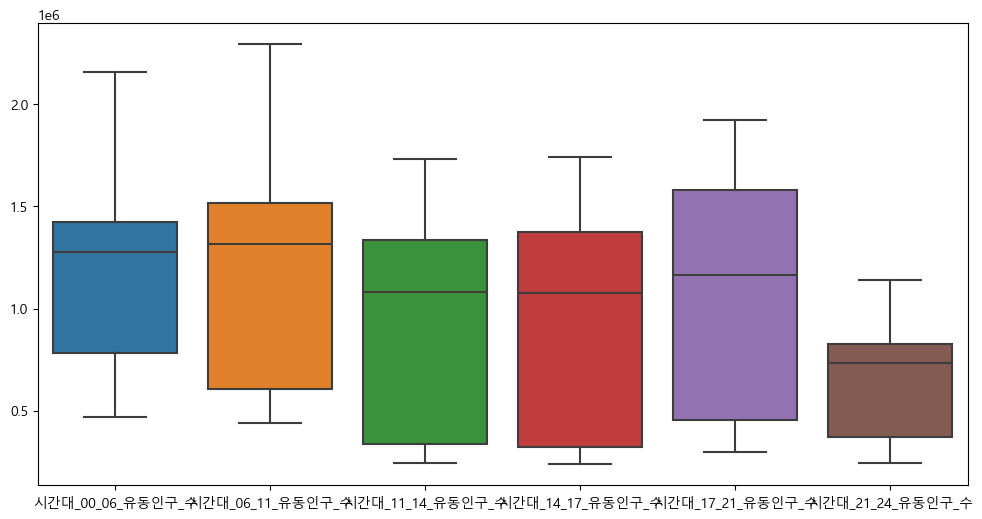

In [119]:
# 각 연령대별로 상자 그림(Boxplot)을 그려서 이상치 탐지
plt.figure(figsize=(12, 6))
sns.boxplot(data=Gaepo_Street_data_df[['시간대_00_06_유동인구_수', '시간대_06_11_유동인구_수', '시간대_11_14_유동인구_수',
                '시간대_14_17_유동인구_수', '시간대_17_21_유동인구_수', '시간대_21_24_유동인구_수']])

# 이상치 제거
Q1 = Gaepo_Street_data_df[['시간대_00_06_유동인구_수', '시간대_06_11_유동인구_수', '시간대_11_14_유동인구_수',
                '시간대_14_17_유동인구_수', '시간대_17_21_유동인구_수', '시간대_21_24_유동인구_수']].quantile(0.25)
Q3 = Gaepo_Street_data_df[['시간대_00_06_유동인구_수', '시간대_06_11_유동인구_수', '시간대_11_14_유동인구_수',
                '시간대_14_17_유동인구_수', '시간대_17_21_유동인구_수', '시간대_21_24_유동인구_수']].quantile(0.75)
IQR = Q3 - Q1

# 각 연령대별로 이상치 제거
data_filtered = Gaepo_Street_data_df[~((Gaepo_Street_data_df[['시간대_00_06_유동인구_수', '시간대_06_11_유동인구_수', '시간대_11_14_유동인구_수',
                '시간대_14_17_유동인구_수', '시간대_17_21_유동인구_수', '시간대_21_24_유동인구_수']] < (Q1 - 1.5 * IQR)) | 
                       (Gaepo_Street_data_df[['시간대_00_06_유동인구_수', '시간대_06_11_유동인구_수', '시간대_11_14_유동인구_수',
                '시간대_14_17_유동인구_수', '시간대_17_21_유동인구_수', '시간대_21_24_유동인구_수']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# 이상치 제거 후 연령대별로 박스플롯(Boxplot) 다시 그리기
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_filtered[['시간대_00_06_유동인구_수', '시간대_06_11_유동인구_수', '시간대_11_14_유동인구_수',
                '시간대_14_17_유동인구_수', '시간대_17_21_유동인구_수', '시간대_21_24_유동인구_수']])

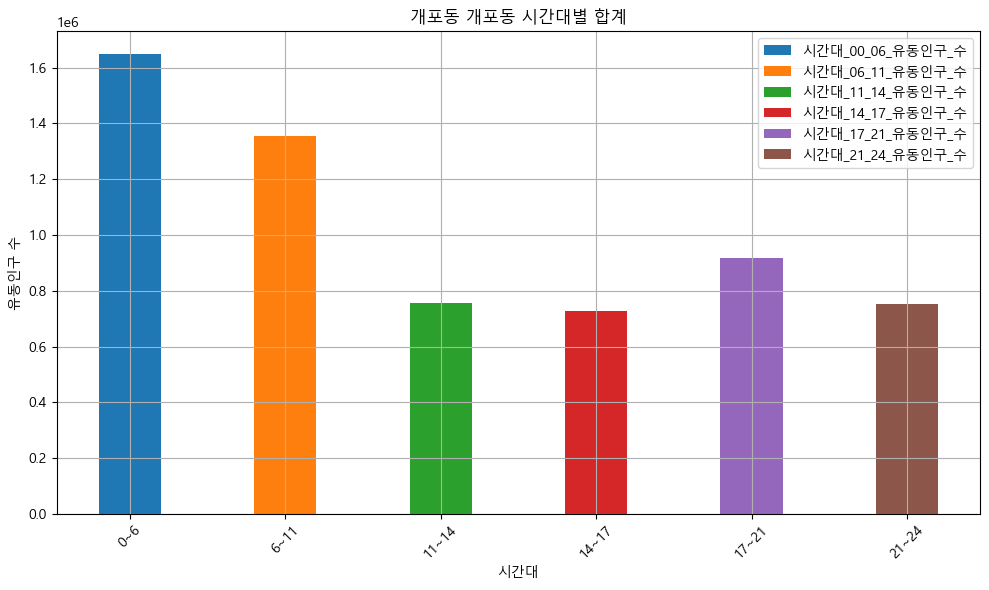

In [120]:
# 필터링할 행정동
target_dong = '개포동'

# 해당 행정동에 해당하는 데이터 추출
filtered_data = Gaepo_Street_data_df[Gaepo_Street_data_df['행정동'] == target_dong]

# 시각화할 시간대별 컬럼 선택
time_columns = ['시간대_00_06_유동인구_수', '시간대_06_11_유동인구_수', '시간대_11_14_유동인구_수',
                '시간대_14_17_유동인구_수', '시간대_17_21_유동인구_수', '시간대_21_24_유동인구_수']

# 요일별 유동인구 시각화 (막대 그래프)
plt.figure(figsize=(10, 6))
x_labels = ['0~6', '6~11', '11~14', '14~17', 
            '17~21', '21~24']  # x축 레이블
x = range(len(time_columns))
for i, column in enumerate(time_columns):
    plt.bar(x[i], filtered_data[column].sum(), label=column, width=0.4)  # 각 연령대별 상주인구 수를 합하여 막대로 표시

plt.title(f'{target_dong} 개포동 시간대별 합계')
plt.xlabel('시간대')
plt.ylabel('유동인구 수')
plt.xticks(x, x_labels, rotation=45)  # x축 레이블 지정
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


- 요일별

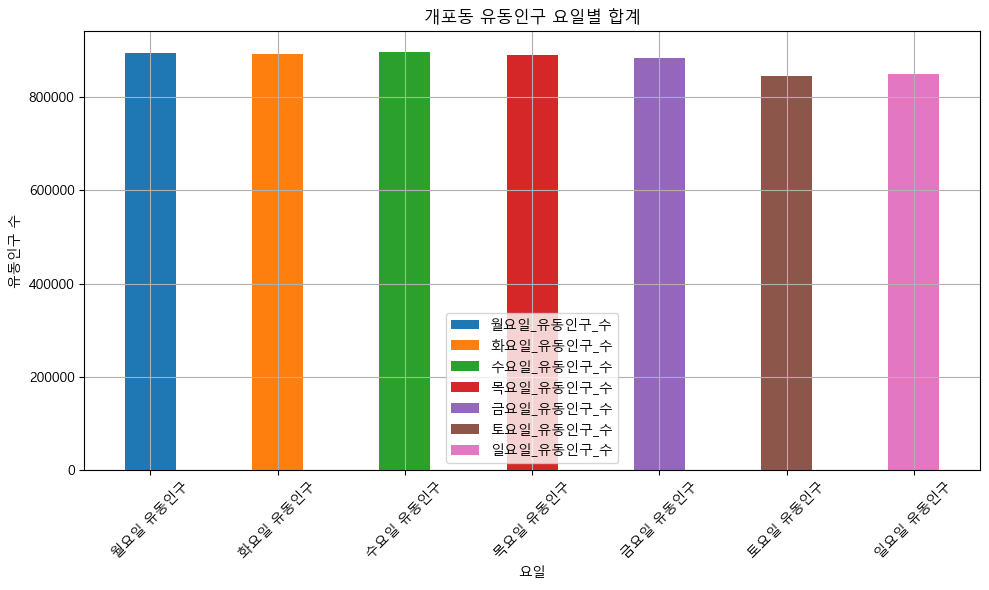

In [121]:
# 필터링할 행정동
target_dong = '개포동'

# 해당 행정동에 해당하는 데이터 추출
filtered_data = Gaepo_Street_data_df[Gaepo_Street_data_df['행정동'] == target_dong]

# 시각화할 시간대별 컬럼 선택
day_columns = ['월요일_유동인구_수', '화요일_유동인구_수','수요일_유동인구_수', 
               '목요일_유동인구_수', '금요일_유동인구_수', '토요일_유동인구_수', 
               '일요일_유동인구_수']

# 요일별 유동인구 시각화 (막대 그래프)
plt.figure(figsize=(10, 6))
x_labels = ['월요일 유동인구', '화요일 유동인구', '수요일 유동인구', '목요일 유동인구', 
            '금요일 유동인구', '토요일 유동인구', '일요일 유동인구']  # x축 레이블
x = range(len(day_columns))
for i, column in enumerate(day_columns):
    plt.bar(x[i], filtered_data[column].sum(), label=column, width=0.4)  # 각 연령대별 상주인구 수를 합하여 막대로 표시

plt.title(f'{target_dong} 유동인구 요일별 합계')
plt.xlabel('요일')
plt.ylabel('유동인구 수')
plt.xticks(x, x_labels, rotation=45)  # x축 레이블 지정
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [122]:
# plt.rcParams['font.family'] = 'Malgun Gothic'

# target_dong = '개포동'

# # 해당 행정동, 년도, 분기에 해당하는 데이터 추출
# filtered_data_2 = Gaepo_Resident_data_df[(Gaepo_Resident_data_df['행정동'] == target_dong)]

# # 시각화할 연령대 컬럼 선택
# age_columns = ['연령대_10_상주인구_수', '연령대_20_상주인구_수', '연령대_30_상주인구_수',
#                '연령대_40_상주인구_수', '연령대_50_상주인구_수', '연령대_60_이상_상주인구_수']

# # 연령대별 상주인구 시각화 (막대 그래프)
# plt.figure(figsize=(10, 6))
# x_labels = ['연령대 10', '연령대 20', '연령대 30', '연령대 40', '연령대 50', '연령대 60 이상']  # x축 레이블
# x = range(len(age_columns))
# for i, column in enumerate(age_columns):
#     plt.bar(x[i], filtered_data_2[column].sum(), label=column)  # 각 연령대별 상주인구 수를 합하여 막대로 표시

# plt.title(f'{target_dong} 상주인구 연령대별 합계')
# plt.xlabel('연령대')
# plt.ylabel('상주인구 수')
# plt.xticks(x, x_labels, rotation=45)  # x축 레이블 지정
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [123]:
Gaepo_Street_data_df.columns

Index(['행정동', '기준_년분기_코드', '행정동_코드', '총_유동인구_수', '남성_유동인구_수', '여성_유동인구_수',
       '연령대_10_유동인구_수', '연령대_20_유동인구_수', '연령대_30_유동인구_수', '연령대_40_유동인구_수',
       '연령대_50_유동인구_수', '연령대_60_이상_유동인구_수', '시간대_00_06_유동인구_수',
       '시간대_06_11_유동인구_수', '시간대_11_14_유동인구_수', '시간대_14_17_유동인구_수',
       '시간대_17_21_유동인구_수', '시간대_21_24_유동인구_수', '월요일_유동인구_수', '화요일_유동인구_수',
       '수요일_유동인구_수', '목요일_유동인구_수', '금요일_유동인구_수', '토요일_유동인구_수', '일요일_유동인구_수'],
      dtype='object')

- 상주인구 데이터 불러와서 분석해보기

In [124]:
Gaepo_Resident_data_path = '../csv/new_상주인구_행정동.csv'
Gaepo_Resident_data_df = pd.read_csv(Gaepo_Resident_data_path, encoding='utf-8-sig')
pd.options.display.float_format = '{:}'.format
Gaepo_Resident_data_df.head(3)

,행정동,기준_년분기_코드,행정동_코드,총_상주인구_수,남성_상주인구_수,여성_상주인구_수,연령대_10_상주인구_수,연령대_20_상주인구_수,연령대_30_상주인구_수,연령대_40_상주인구_수,...,남성연령대_60_이상_상주인구_수,여성연령대_10_상주인구_수,여성연령대_20_상주인구_수,여성연령대_30_상주인구_수,여성연령대_40_상주인구_수,여성연령대_50_상주인구_수,여성연령대_60_이상_상주인구_수,총_가구_수,아파트_가구_수,비_아파트_가구_수
0,신사동,20231,11680510.0,18137.0,8472.0,9665.0,2230.0,2121.0,2768.0,3104.0,...,2216.0,1072.0,1056.0,1575.0,1732.0,1594.0,2636.0,7476.0,0.0,7476.0
1,신사동,20232,11680510.0,18137.0,8472.0,9665.0,2230.0,2121.0,2768.0,3104.0,...,2216.0,1072.0,1056.0,1575.0,1732.0,1594.0,2636.0,7323.0,0.0,7323.0
2,신사동,20233,11680510.0,18137.0,8472.0,9665.0,2230.0,2121.0,2768.0,3104.0,...,2216.0,1072.0,1056.0,1575.0,1732.0,1594.0,2636.0,7323.0,0.0,7323.0


In [125]:
# 개포동 데이터 가져오기
filtered_data_2 = Gaepo_Resident_data_df[Gaepo_Resident_data_df['행정동'] == '개포동']

# 2023 3분기 데이터 가져오기
filtered_data_2_202303 = filtered_data_2[filtered_data_2['기준_년분기_코드'] == 20233]

# 결과 출력
round(filtered_data_2_202303,1)

,행정동,기준_년분기_코드,행정동_코드,총_상주인구_수,남성_상주인구_수,여성_상주인구_수,연령대_10_상주인구_수,연령대_20_상주인구_수,연령대_30_상주인구_수,연령대_40_상주인구_수,...,남성연령대_60_이상_상주인구_수,여성연령대_10_상주인구_수,여성연령대_20_상주인구_수,여성연령대_30_상주인구_수,여성연령대_40_상주인구_수,여성연령대_50_상주인구_수,여성연령대_60_이상_상주인구_수,총_가구_수,아파트_가구_수,비_아파트_가구_수
26,개포동,20233,11680673.3,12844.3,6284.7,6559.7,1620.3,1905.7,1734.7,1799.7,...,1653.7,785.0,938.0,881.3,946.3,1273.3,1735.7,6665.7,0.0,6665.7


In [126]:
Gaepo_Resident_data_df.columns

Index(['행정동', '기준_년분기_코드', '행정동_코드', '총_상주인구_수', '남성_상주인구_수', '여성_상주인구_수',
       '연령대_10_상주인구_수', '연령대_20_상주인구_수', '연령대_30_상주인구_수', '연령대_40_상주인구_수',
       '연령대_50_상주인구_수', '연령대_60_이상_상주인구_수', '남성연령대_10_상주인구_수',
       '남성연령대_20_상주인구_수', '남성연령대_30_상주인구_수', '남성연령대_40_상주인구_수',
       '남성연령대_50_상주인구_수', '남성연령대_60_이상_상주인구_수', '여성연령대_10_상주인구_수',
       '여성연령대_20_상주인구_수', '여성연령대_30_상주인구_수', '여성연령대_40_상주인구_수',
       '여성연령대_50_상주인구_수', '여성연령대_60_이상_상주인구_수', '총_가구_수', '아파트_가구_수',
       '비_아파트_가구_수'],
      dtype='object')

- 연령대별

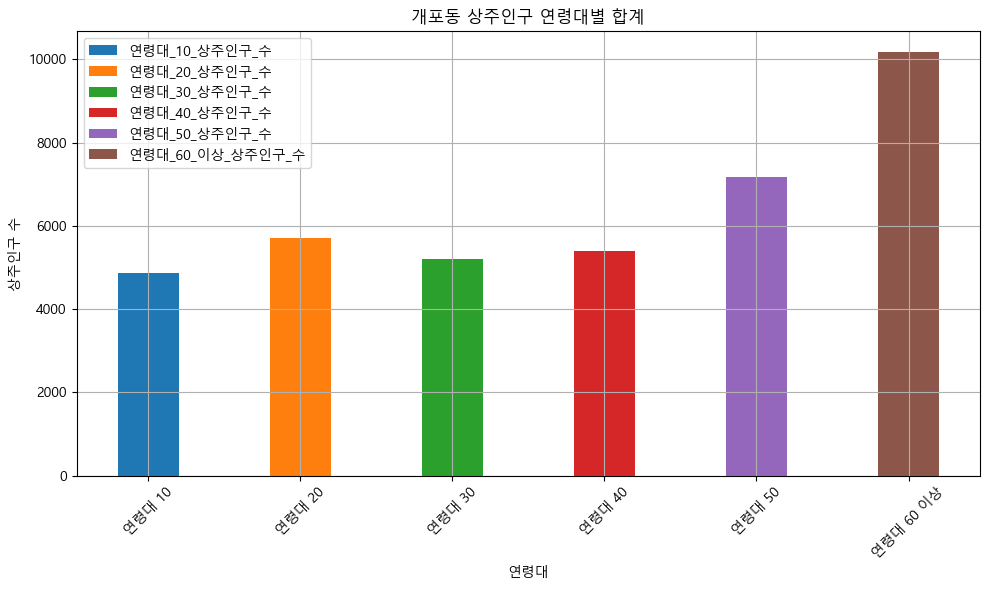

In [127]:
plt.rcParams['font.family'] = 'Malgun Gothic'

target_dong = '개포동'

# 해당 행정동, 년도, 분기에 해당하는 데이터 추출
filtered_data_2 = Gaepo_Resident_data_df[(Gaepo_Resident_data_df['행정동'] == target_dong)]

# 시각화할 연령대 컬럼 선택
age_columns = ['연령대_10_상주인구_수', '연령대_20_상주인구_수', '연령대_30_상주인구_수',
               '연령대_40_상주인구_수', '연령대_50_상주인구_수', '연령대_60_이상_상주인구_수']

# 연령대별 상주인구 시각화 (막대 그래프)
plt.figure(figsize=(10, 6))
x_labels = ['연령대 10', '연령대 20', '연령대 30', '연령대 40', '연령대 50', '연령대 60 이상']  # x축 레이블
x = range(len(age_columns))
for i, column in enumerate(age_columns):
    plt.bar(x[i], filtered_data_2[column].sum(), label=column, width=0.4)  # 각 연령대별 상주인구 수를 합하여 막대로 표시

plt.title(f'{target_dong} 상주인구 연령대별 합계')
plt.xlabel('연령대')
plt.ylabel('상주인구 수')
plt.xticks(x, x_labels, rotation=45)  # x축 레이블 지정
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


상주인구와 추정매출에 가중치로 효율분석
=========================


In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Gaepo_data_path1 = '../csv/new_상주인구_행정동.csv'
Gaepo_df1 = pd.read_csv(Gaepo_data_path1, encoding='utf-8-sig')

Gaepo_data_path2 = '../csv/합쳐진_동_음식점_종류별_매출.csv'
Gaepo_df2 = pd.read_csv(Gaepo_data_path2, encoding='utf-8-sig')

pd.options.display.float_format = '{:}'.format
print(Gaepo_df1.head(3))

print(Gaepo_df2.head(3))

   행정동  기준_년분기_코드     행정동_코드  총_상주인구_수  남성_상주인구_수  여성_상주인구_수  연령대_10_상주인구_수  \
0  신사동      20231 11680510.0   18137.0     8472.0     9665.0         2230.0   
1  신사동      20232 11680510.0   18137.0     8472.0     9665.0         2230.0   
2  신사동      20233 11680510.0   18137.0     8472.0     9665.0         2230.0   

   연령대_20_상주인구_수  연령대_30_상주인구_수  연령대_40_상주인구_수  ...  남성연령대_60_이상_상주인구_수  \
0         2121.0         2768.0         3104.0  ...              2216.0   
1         2121.0         2768.0         3104.0  ...              2216.0   
2         2121.0         2768.0         3104.0  ...              2216.0   

   여성연령대_10_상주인구_수  여성연령대_20_상주인구_수  여성연령대_30_상주인구_수  여성연령대_40_상주인구_수  \
0           1072.0           1056.0           1575.0           1732.0   
1           1072.0           1056.0           1575.0           1732.0   
2           1072.0           1056.0           1575.0           1732.0   

   여성연령대_50_상주인구_수  여성연령대_60_이상_상주인구_수  총_가구_수  아파트_가구_수  비_아파트_가구_수  
0           1594.0

In [129]:
# 행정동을 기준으로 두 데이터프레임 합치기
merged_df = pd.merge(Gaepo_df1, Gaepo_df2, on='행정동', how='inner')

# 합쳐진 데이터프레임 출력
print(merged_df.head())

   행정동  기준_년분기_코드_x     행정동_코드  총_상주인구_수  남성_상주인구_수  여성_상주인구_수  연령대_10_상주인구_수  \
0  신사동        20231 11680510.0   18137.0     8472.0     9665.0         2230.0   
1  신사동        20231 11680510.0   18137.0     8472.0     9665.0         2230.0   
2  신사동        20231 11680510.0   18137.0     8472.0     9665.0         2230.0   
3  신사동        20231 11680510.0   18137.0     8472.0     9665.0         2230.0   
4  신사동        20231 11680510.0   18137.0     8472.0     9665.0         2230.0   

   연령대_20_상주인구_수  연령대_30_상주인구_수  연령대_40_상주인구_수  ...  여성연령대_60_이상_상주인구_수  \
0         2121.0         2768.0         3104.0  ...              2636.0   
1         2121.0         2768.0         3104.0  ...              2636.0   
2         2121.0         2768.0         3104.0  ...              2636.0   
3         2121.0         2768.0         3104.0  ...              2636.0   
4         2121.0         2768.0         3104.0  ...              2636.0   

   총_가구_수  아파트_가구_수  비_아파트_가구_수  서비스_업종_코드_명  서비스_업종_코드_명.1  기

In [130]:
# CSV 파일로 저장
merged_df.to_csv('상주인구와추정매출.csv', index=False, encoding='utf-8-sig')

In [131]:
# 각 행정동의 매출을 거주 인구로 나누어 매출의 효율을 분석하는 코드
merged_df['효율적_매출'] = merged_df['당월_매출_금액'] / merged_df['총_상주인구_수']
merged_df['효율적_매출'] = merged_df['효율적_매출'].round(1)

# 결과 확인
print(merged_df.head(3))

   행정동  기준_년분기_코드_x     행정동_코드  총_상주인구_수  남성_상주인구_수  여성_상주인구_수  연령대_10_상주인구_수  \
0  신사동        20231 11680510.0   18137.0     8472.0     9665.0         2230.0   
1  신사동        20231 11680510.0   18137.0     8472.0     9665.0         2230.0   
2  신사동        20231 11680510.0   18137.0     8472.0     9665.0         2230.0   

   연령대_20_상주인구_수  연령대_30_상주인구_수  연령대_40_상주인구_수  ...  총_가구_수  아파트_가구_수  \
0         2121.0         2768.0         3104.0  ...  7476.0       0.0   
1         2121.0         2768.0         3104.0  ...  7476.0       0.0   
2         2121.0         2768.0         3104.0  ...  7476.0       0.0   

   비_아파트_가구_수  서비스_업종_코드_명  서비스_업종_코드_명.1  기준_년분기_코드_y     당월_매출_금액  \
0      7476.0        분식전문점          분식전문점        20231 3883372999.0   
1      7476.0        분식전문점          분식전문점        20232 3707749342.0   
2      7476.0        분식전문점          분식전문점        20233 3031454684.0   

      주중_매출_금액   주말_매출_금액   효율적_매출  
0 2954168419.0  929204580 214113.3  
1 2807087665.0  9006616

In [132]:
# '효율적_매출' 컬럼만 출력
print(merged_df['효율적_매출'])


0      214113.3
1      204430.1
2      167142.0
3      687846.1
4      625219.7
         ...   
1069   594097.3
1070   606051.5
1071   580701.8
1072    16700.5
1073    20869.7
Name: 효율적_매출, Length: 1074, dtype: float64


In [133]:
# '효율적_매출' 컬럼과 '행정동' 컬럼 함께 출력
print(merged_df[['행정동', '효율적_매출']])


      행정동   효율적_매출
0     신사동 214113.3
1     신사동 204430.1
2     신사동 167142.0
3     신사동 687846.1
4     신사동 625219.7
...   ...      ...
1069  수서동 594097.3
1070  수서동 606051.5
1071  수서동 580701.8
1072  수서동  16700.5
1073  수서동  20869.7

[1074 rows x 2 columns]


In [134]:
# '행정동', '음식업종', '효율적_매출' 컬럼 함께 출력
print(merged_df[['행정동', '서비스_업종_코드_명', '효율적_매출']])


      행정동 서비스_업종_코드_명   효율적_매출
0     신사동       분식전문점 214113.3
1     신사동       분식전문점 204430.1
2     신사동       분식전문점 167142.0
3     신사동       양식음식점 687846.1
4     신사동       양식음식점 625219.7
...   ...         ...      ...
1069  수서동       한식음식점 594097.3
1070  수서동       한식음식점 606051.5
1071  수서동       한식음식점 580701.8
1072  수서동     호프-간이주점  16700.5
1073  수서동     호프-간이주점  20869.7

[1074 rows x 3 columns]


In [135]:
merged_df.columns

Index(['행정동', '기준_년분기_코드_x', '행정동_코드', '총_상주인구_수', '남성_상주인구_수', '여성_상주인구_수',
       '연령대_10_상주인구_수', '연령대_20_상주인구_수', '연령대_30_상주인구_수', '연령대_40_상주인구_수',
       '연령대_50_상주인구_수', '연령대_60_이상_상주인구_수', '남성연령대_10_상주인구_수',
       '남성연령대_20_상주인구_수', '남성연령대_30_상주인구_수', '남성연령대_40_상주인구_수',
       '남성연령대_50_상주인구_수', '남성연령대_60_이상_상주인구_수', '여성연령대_10_상주인구_수',
       '여성연령대_20_상주인구_수', '여성연령대_30_상주인구_수', '여성연령대_40_상주인구_수',
       '여성연령대_50_상주인구_수', '여성연령대_60_이상_상주인구_수', '총_가구_수', '아파트_가구_수',
       '비_아파트_가구_수', '서비스_업종_코드_명', '서비스_업종_코드_명.1', '기준_년분기_코드_y', '당월_매출_금액',
       '주중_매출_금액', '주말_매출_금액', '효율적_매출'],
      dtype='object')

In [136]:
# '기준_년분기_코드'가 '20233'인 데이터를 선택하고, '행정동', '서비스_업종_코드_명', '효율적_매출' 컬럼 함께 출력
print(merged_df[merged_df['기준_년분기_코드_y'] == 20233][['행정동', '서비스_업종_코드_명', '효율적_매출']])

      행정동 서비스_업종_코드_명   효율적_매출
2     신사동       분식전문점 167142.0
5     신사동       양식음식점 649409.8
8     신사동       일식음식점 781810.4
11    신사동         제과점 127181.4
14    신사동       중식음식점 125145.9
...   ...         ...      ...
1062  수서동       치킨전문점  17410.7
1065  수서동       커피-음료 186066.3
1068  수서동      패스트푸드점  82154.3
1071  수서동       한식음식점 580701.8
1073  수서동     호프-간이주점  20869.7

[357 rows x 3 columns]


In [137]:
# '기준_년분기_코드'가 '20233'인 데이터를 선택하여 새로운 데이터프레임 생성
quarter_20233_df = merged_df[merged_df['기준_년분기_코드_y'] == 20233][['행정동', '서비스_업종_코드_명', '효율적_매출']].copy()

# 결과 확인
print(quarter_20233_df.head(3))



   행정동 서비스_업종_코드_명   효율적_매출
2  신사동       분식전문점 167142.0
5  신사동       양식음식점 649409.8
8  신사동       일식음식점 781810.4


In [138]:
# '효율적_매출' 열을 기준으로 내림차순으로 정렬
quarter_20233_df_sorted = quarter_20233_df.sort_values(by='효율적_매출', ascending=False)

# 정렬된 데이터프레임 출력
print(quarter_20233_df_sorted.head(3))


     행정동 서비스_업종_코드_명    효율적_매출
146  논현동       한식음식점 3874527.6
176  논현동       한식음식점 3874527.6
116  논현동       한식음식점 3874527.6


In [139]:
# '행정동'이 '개포동'인 데이터만 선택
gaepo_quarter_20233_df = quarter_20233_df_sorted[quarter_20233_df_sorted['행정동'] == '개포동']

# 개포동 데이터프레임 출력
print(gaepo_quarter_20233_df.head())


     행정동 서비스_업종_코드_명    효율적_매출
806  개포동       한식음식점 1014945.1
776  개포동       한식음식점 1014945.1
746  개포동       한식음식점 1014945.1
722  개포동       분식전문점  182573.5
782  개포동       분식전문점  182573.5


1. 막대 그래프

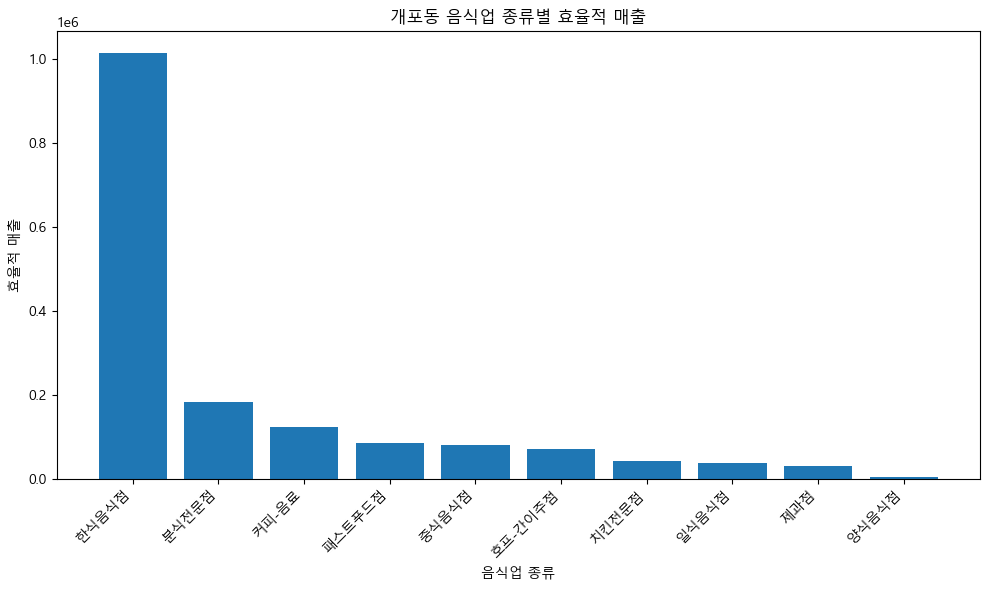

In [140]:
plt.rcParams['font.family'] = 'Malgun Gothic'

# 음식업 종류별 효율적인 매출을 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.bar(gaepo_quarter_20233_df['서비스_업종_코드_명'], gaepo_quarter_20233_df['효율적_매출'])
plt.xlabel('음식업 종류')
plt.ylabel('효율적 매출')
plt.title('개포동 음식업 종류별 효율적 매출')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



 * 이상치 제거 필요할듯

In [141]:
# 효율적 매출 열 데이터 추출
efficiency_sales = gaepo_quarter_20233_df['효율적_매출']

# 제 1사분위수(Q1)와 제 3사분위수(Q3) 계산
Q1 = np.percentile(efficiency_sales, 25)
Q3 = np.percentile(efficiency_sales, 75)

# IQR 계산
IQR = Q3 - Q1

# 이상치 경계 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 제거
gaepo_quarter_20233_df_cleaned = gaepo_quarter_20233_df[(efficiency_sales >= lower_bound) & (efficiency_sales <= upper_bound)]

In [142]:
# 사실상 한식 날아감...
print(gaepo_quarter_20233_df_cleaned)

     행정동 서비스_업종_코드_명   효율적_매출
722  개포동       분식전문점 182573.5
782  개포동       분식전문점 182573.5
752  개포동       분식전문점 182573.5
800  개포동       커피-음료 122601.2
770  개포동       커피-음료 122601.2
740  개포동       커피-음료 122601.2
743  개포동      패스트푸드점  85108.2
773  개포동      패스트푸드점  85108.2
803  개포동      패스트푸드점  85108.2
794  개포동       중식음식점  80332.5
764  개포동       중식음식점  80332.5
734  개포동       중식음식점  80332.5
809  개포동     호프-간이주점  71077.9
779  개포동     호프-간이주점  71077.9
749  개포동     호프-간이주점  71077.9
797  개포동       치킨전문점  42577.0
737  개포동       치킨전문점  42577.0
767  개포동       치킨전문점  42577.0
728  개포동       일식음식점  36961.6
788  개포동       일식음식점  36961.6
758  개포동       일식음식점  36961.6
731  개포동         제과점  31248.0
761  개포동         제과점  31248.0
791  개포동         제과점  31248.0
755  개포동       양식음식점   5155.5
725  개포동       양식음식점   5155.5
785  개포동       양식음식점   5155.5


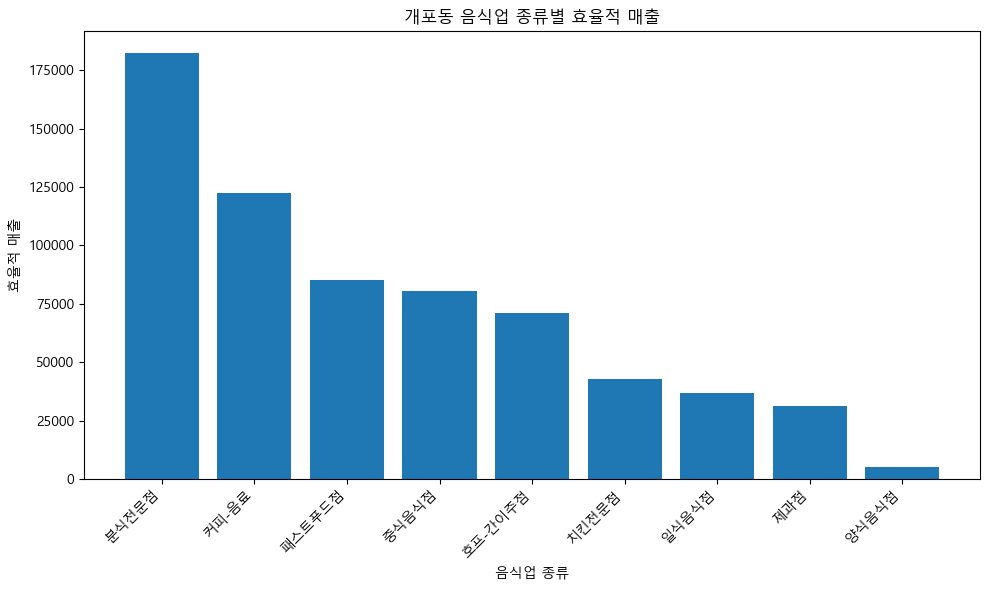

In [143]:
plt.rcParams['font.family'] = 'Malgun Gothic'

# 음식업 종류별 효율적인 매출을 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.bar(gaepo_quarter_20233_df_cleaned['서비스_업종_코드_명'], gaepo_quarter_20233_df_cleaned['효율적_매출'])
plt.xlabel('음식업 종류')
plt.ylabel('효율적 매출')
plt.title('개포동 음식업 종류별 효율적 매출')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


2. 상자 수염 그래프

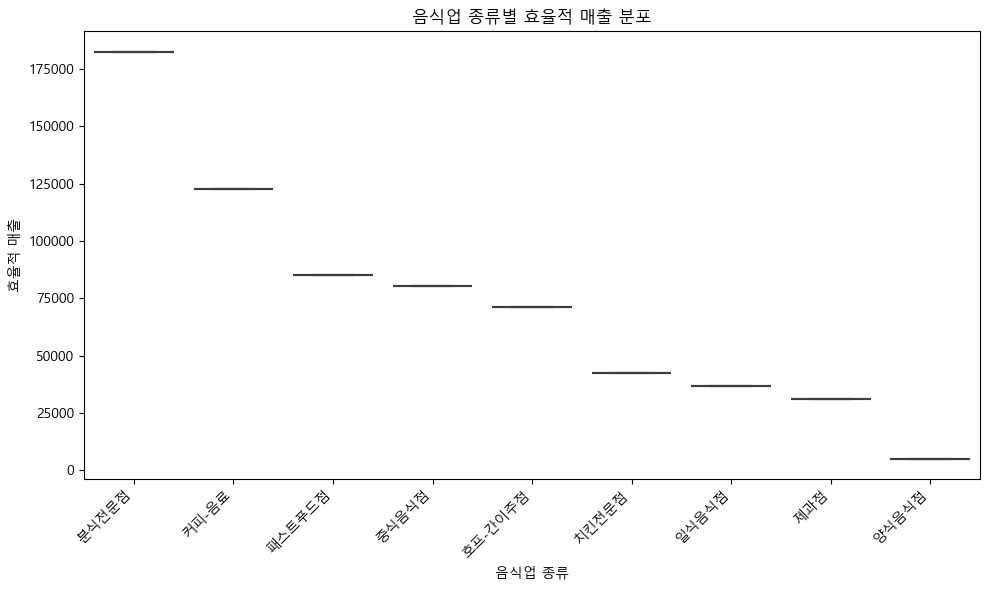

In [144]:
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'

# 음식업 종류별 효율적인 매출을 상자 수염 그림으로 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='서비스_업종_코드_명', y='효율적_매출', data=gaepo_quarter_20233_df_cleaned)
plt.xlabel('음식업 종류')
plt.ylabel('효율적 매출')
plt.title('음식업 종류별 효율적 매출 분포')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


3. 산점도 그래프

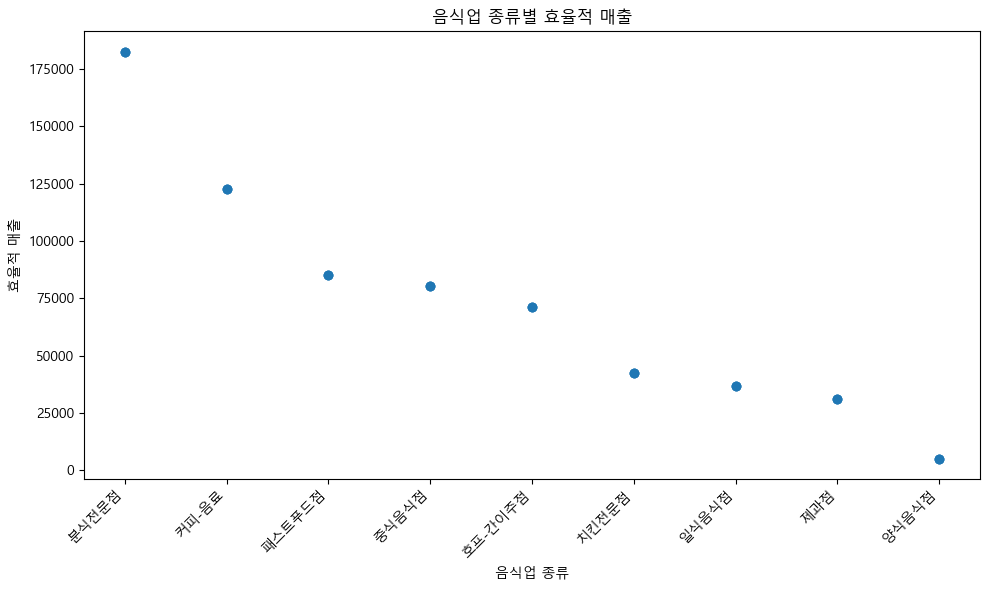

In [145]:
# 음식업 종류별 효율적인 매출을 산점도 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.scatter(gaepo_quarter_20233_df_cleaned['서비스_업종_코드_명'], gaepo_quarter_20233_df_cleaned['효율적_매출'])
plt.xlabel('음식업 종류')
plt.ylabel('효율적 매출')
plt.title('음식업 종류별 효율적 매출')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

4. 박스 그래프

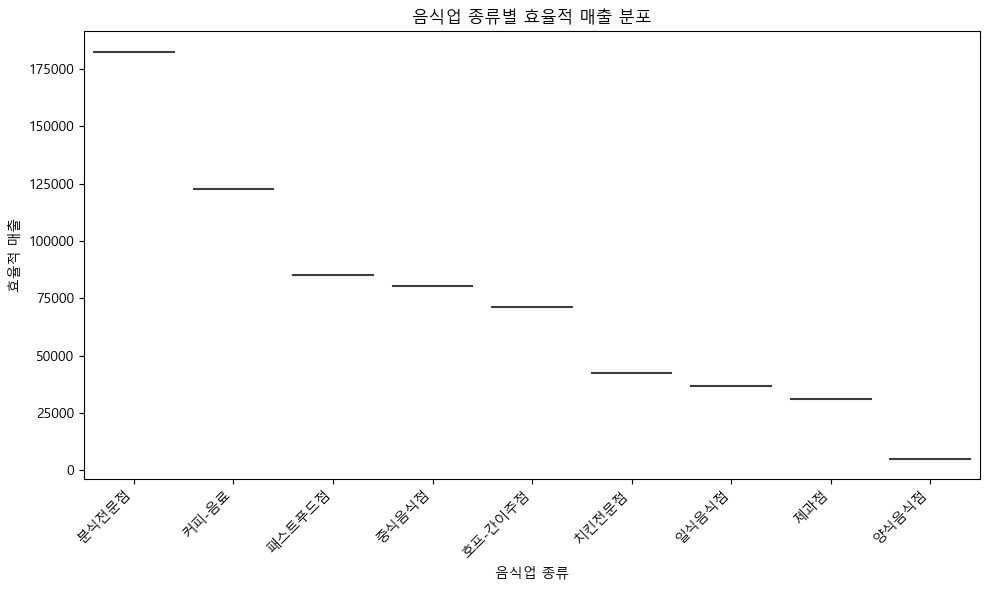

In [146]:
# 음식업 종류별 효율적인 매출을 박스 그래프로 시각화
plt.figure(figsize=(10, 6))
sns.violinplot(x='서비스_업종_코드_명', y='효율적_매출', data=gaepo_quarter_20233_df_cleaned)
plt.xlabel('음식업 종류')
plt.ylabel('효율적 매출')
plt.title('음식업 종류별 효율적 매출 분포')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
